<a href="https://colab.research.google.com/github/koushikdas28/Capstone-1-Hotel-Booking-Analysis-Koushik-Das/blob/main/Team_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
work_dir_path='/content/drive/MyDrive/Colab Notebooks/Team Capstone project-1/'

In [ ]:
#Read the dataset
df=pd.read_csv(work_dir_path +'Hotel Bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We observing that there are 119390 rows and 32 coloumns in the given dataset.
Also there are some columns like 'children', 'company', 'country' and 'agent' have null values in the given dataframe.


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## First of all, let's explore the different columns of the given data frame.

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#let's see the unique values attained by some of the columns.
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

There are two types of hotel: 'Resort Hotel', 'City Hotel'.

In [ ]:
df['is_canceled'].unique(	)

array([0, 1])

In [ ]:
df['arrival_date_year'].unique(	)

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique(	)

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['country'].unique(	)

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

#  Data Cleaning
Cleaning data is the very important step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: 
1. Remove duplicate rows   
2. Handling missing values.
3. Convert columns to appropriate datatypes. 
4.Adding important columns





In [ ]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


We can see there are four columns where the null values are present.

In [ ]:
# No of null values present in the respective four columns.
print(df.isnull().sum().sort_values(ascending=False))

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

We can see company and agent columns have company numbers and agent numbers as data. These columns contains some null values.

This is possible when the customer didn't book the hotel via any agent or company. So in that case values can be null under these columns. In that case, we will replace null values with 0 in these columns.



# Replacing Missing Values.

In [ ]:
#Replacing null values by 0.
df[['company','agent']] = df[['company','agent']].fillna(0)

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

We see that 'nan' values are the missing values which are present in the children column. We will replace the null values under this column with mean value of childrens.

In [ ]:
#Replacing 'nan' values by mean value.
df['children'].fillna(df['children'].mean(), inplace = True)

 We see that country column also contains some missing values. We will replace the missing value with 'others' country.

In [ ]:
df['country'].fillna('others', inplace = True)


In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

Now we can see all the missing values are replaced.

# Removing Duplicate Rows

In [ ]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

We can see there are 31994 duplicate rows in the dataset.

In [ ]:
# removing duplicate rows
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(87396, 32)

We can see all the duplicate rows are removed.

In [ ]:
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

We observe that there are 166 rows where the sum of no of children, no of adults, and no of babies are 0. This does not make any sense.


In [ ]:
#Removing ambigous rows.
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index,inplace=True)


# Converting to appropriate datatypes.

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Conversion of datatypes  from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
df[['children', 'company', 'agent']].dtypes

children    int64
company     int64
agent       int64
dtype: object

In [ ]:
# Conversion of datatypes  from 'object' to 'datetime'
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 87230, dtype: datetime64[ns]

## Adding some important columns.

In [ ]:
df['total_nights_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
df.shape

(87230, 33)

In [ ]:
#Total no of peoples = adults+children+babies.
df['total_people_stay'] = df['adults']+df['children']+df['babies']

In [ ]:
df.shape

(87230, 34)

# **EDA**

Exploratory data analysis is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.  

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them.  

# Univariate Analysis

# Which type of hotel is mostly preferred? 

Text(0.5, 1.0, 'Pie Chart for Most Preferred  Hotel')

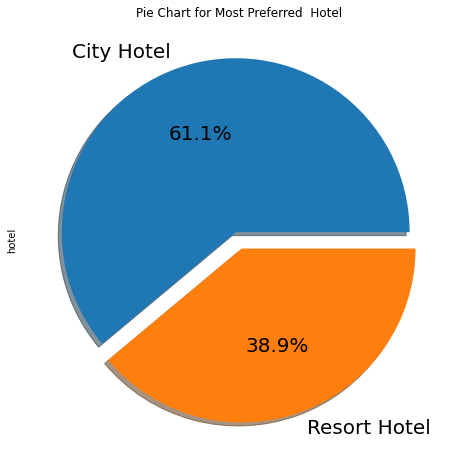

In [ ]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preferred  Hotel')

We can see that City Hotels are more preferred.

## Which type of meal is mostly preferred?

In [ ]:
df['meal'].value_counts()

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

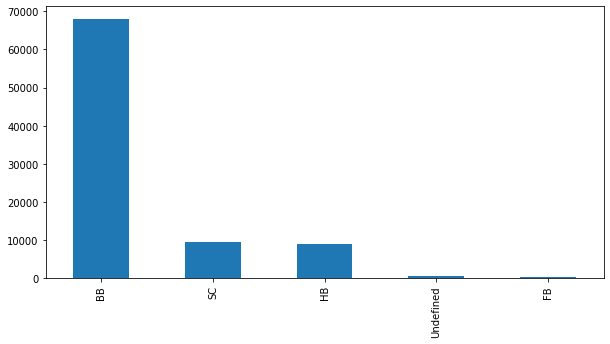

In [ ]:
most_visited_people=df['meal'].value_counts()
plt.figure(figsize=(10,5))
most_visited_people.plot.bar()

So  we can see the most preferred meal type by the guests is BB( Bed and Breakfast).

# Which types of hotel makes more revenue?

In [ ]:
df.groupby(['hotel'])['adr'].value_counts()

hotel         adr   
City Hotel    75.00     1001
              65.00      968
              0.00       953
              95.00      705
              90.00      624
                        ... 
Resort Hotel  402.00       1
              426.25       1
              437.00       1
              450.00       1
              508.00       1
Name: adr, Length: 11271, dtype: int64

Text(0.5, 1.0, 'Most revenue making hotel')

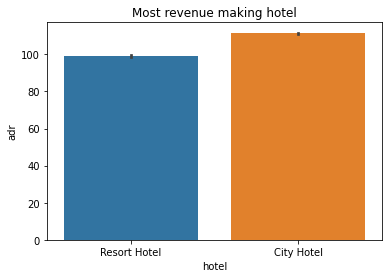

In [ ]:
sns.barplot( y='adr',  x='hotel', data = df)
plt.title('Most revenue making hotel')


We can see City Hotel makes more revenue.

## Which types of rooms are most reserved? 

In [ ]:
df['reserved_room_type'].value_counts()

A    56436
D    17376
E     6036
F     2820
G     2050
B      996
C      914
H      596
L        6
Name: reserved_room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


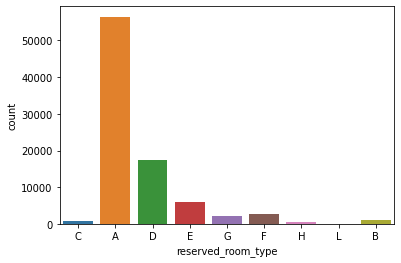

In [ ]:
sns.countplot(df['reserved_room_type'])
plt.show()

We can see room type A has most reserved.

# Which types of hotel has higher booking cancelation rate?

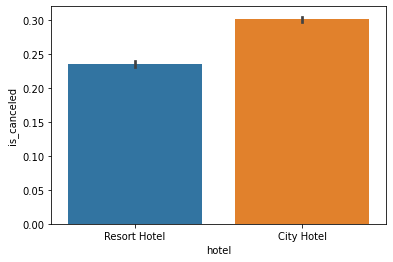

In [ ]:
sns.barplot( y='is_canceled',  x='hotel', data = df)

So, City Hotel has the higher cancelation rate.

# Which is the most common channel for booking hotels?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


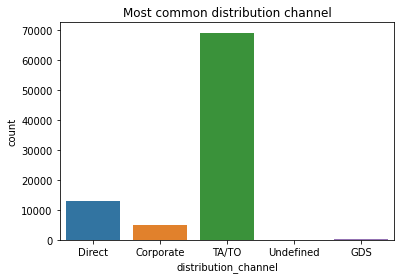

In [ ]:
sns.countplot(df['distribution_channel'])
plt.title('Most common distribution channel')
plt.show()

We see that TA/TO is the most common distribution channel.

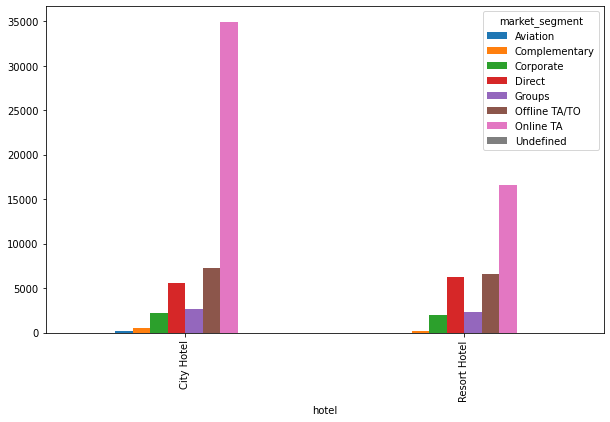

In [ ]:
marketseg=df.groupby(['hotel','market_segment']).size().unstack()
marketseg.plot(kind='bar',figsize=(10,6))

## Market segment VS preferred room types

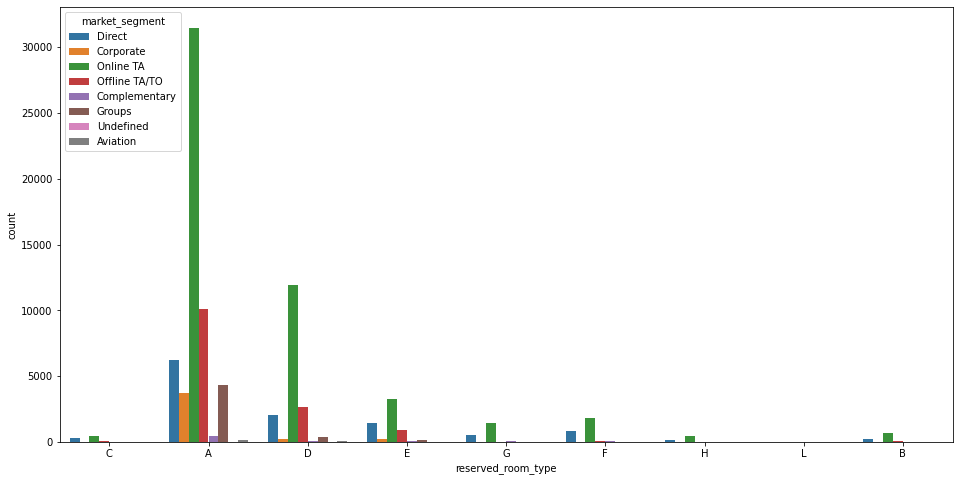

In [ ]:
plt.subplots(figsize=(16,8))
sns.countplot(x='reserved_room_type', hue= 'market_segment', data= df)

Majority of peoples reserved rooms via online TA from different market segments.
Also we can see majority of the people preferred room type A.

## From which country most of the peoples are coming in the hotel?

In [ ]:
df['country'].value_counts()[:10]

PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: country, dtype: int64

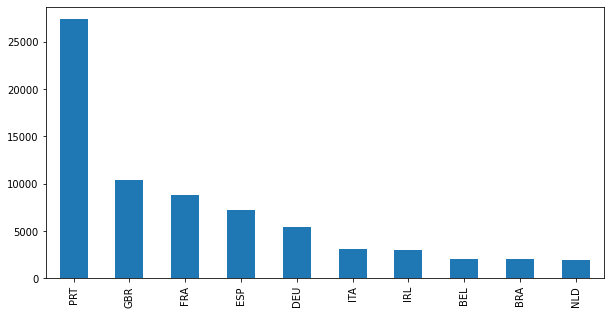

In [ ]:
plt.figure(figsize=(10,5))
df['country'].value_counts()[:10] .plot.bar()
plt.show()

We see that most of the customers are come from Portugal, Great Britain, France and Spain.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


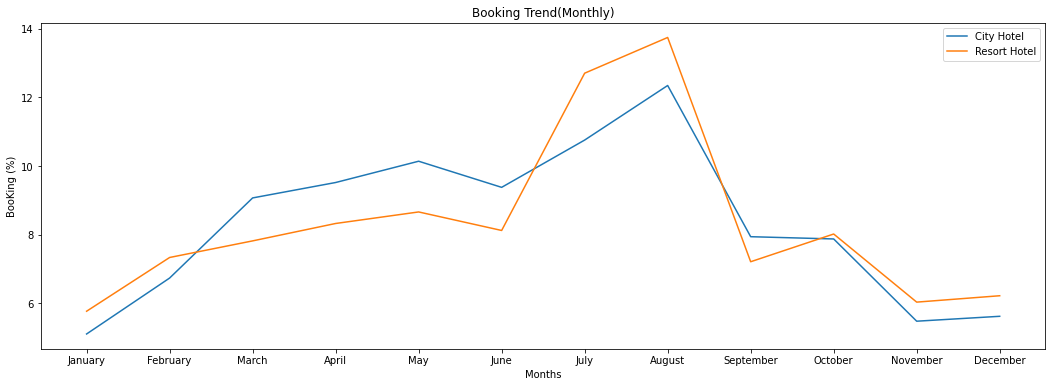

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df.loc[df.hotel=='City Hotel','arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

##for resort
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df.loc[df.hotel=='Resort Hotel','arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100


#line plot
fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('BooKing (%)')
ax.set_title('Booking Trend(Monthly)')

sns.lineplot(x1,y1.values,label='City Hotel',sort = False)
sns.lineplot(x2,y2.values,label='Resort Hotel',sort= False)

plt.show()



## Most no of days in waiting list for different market segments

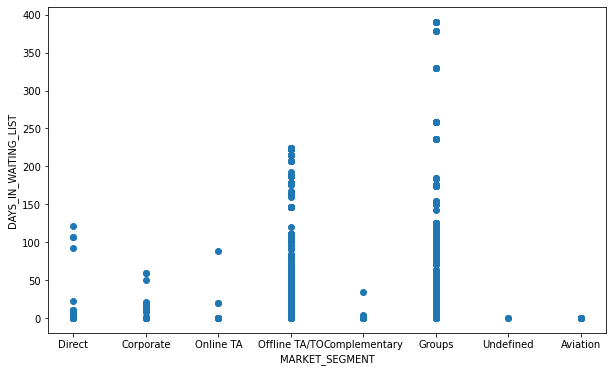

In [ ]:
fig,b=plt.subplots(figsize=(10,6))#here waiting list for aviation type is very less
b.scatter(df['market_segment'],df['days_in_waiting_list'])
b.set_xlabel(('market_segment').upper())
b.set_ylabel(('days_in_waiting_list').upper())
plt.show()

## In which month most of the peoples arrive in the hotel?

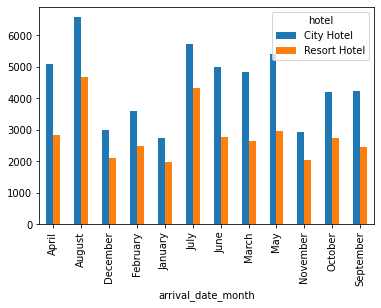

In [ ]:
df1=df.groupby(['arrival_date_month','hotel']).size().unstack()

df1.plot(kind='bar')

Most no of peoples arrive in the month of august and city hotel is most prefered than the resort hotel.

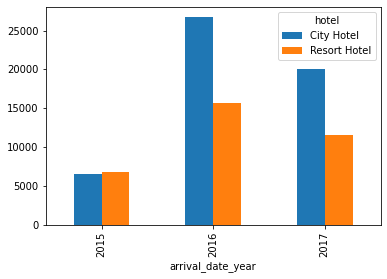

In [ ]:
df2=df.groupby(['arrival_date_year','hotel']).size().unstack()
df2.plot(kind='bar')

Most number of peoples arrive in 2016.

## Total people stay Vs adr

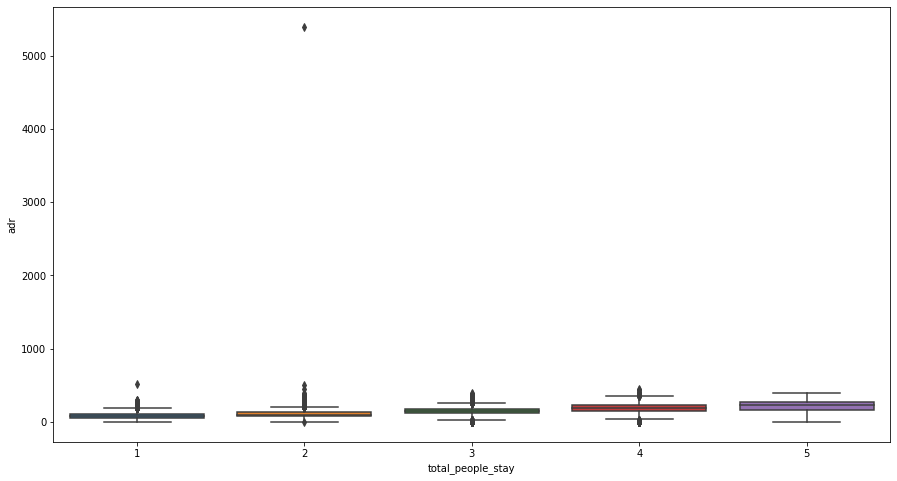

In [ ]:
plt.figure(figsize=(15,8))
df_update=df[df['total_people_stay'] < 6]
sns.boxplot(x=df_update['total_people_stay'],y=df_update['adr'])

## Heatmap 

In [ ]:
#Correlation for the dataset.
corr_matrix=df.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights_stay,total_people_stay
is_canceled,1.000000,0.184515,0.088020,0.001691,0.005449,0.060992,0.084159,0.080271,0.067182,-0.020627,...,-0.052178,-0.093236,-0.001145,-0.075314,0.004710,0.127233,-0.184456,-0.120794,0.085431,0.098987
lead_time,0.184515,1.000000,0.139408,0.101295,0.009899,0.236316,0.312506,0.139033,0.028395,-0.003705,...,-0.079021,0.080822,0.080007,-0.078938,0.131909,0.021948,-0.086736,0.034048,0.320914,0.125262
arrival_date_year,0.088020,0.139408,1.000000,-0.513895,-0.009872,0.005277,0.003765,0.038744,0.041178,-0.023366,...,0.027266,0.008944,-0.002138,0.021289,-0.027490,0.176594,-0.040041,0.064210,0.004776,0.050902
arrival_date_week_number,0.001691,0.101295,-0.513895,1.000000,0.093273,0.027466,0.028498,0.025322,0.013542,0.014302,...,-0.020938,0.012943,0.019724,-0.022852,0.013159,0.099092,0.009054,0.046759,0.031480,0.029802
arrival_date_day_of_month,0.005449,0.009899,-0.009872,0.093273,1.000000,-0.017636,-0.028375,-0.001235,0.015826,-0.000397,...,0.000148,0.007006,0.006084,-0.000598,0.006088,0.022682,0.009040,-0.001677,-0.027707,0.008110
stays_in_weekend_nights,0.060992,0.236316,0.005277,0.027466,-0.017636,1.000000,0.550471,0.091450,0.028911,0.013802,...,-0.056891,0.034624,0.159637,-0.091615,-0.031980,0.040417,-0.042979,0.032816,0.783929,0.090638
stays_in_week_nights,0.084159,0.312506,0.003765,0.028498,-0.028375,0.550471,1.000000,0.099323,0.030936,0.016201,...,-0.058714,0.066425,0.191991,-0.067063,0.001855,0.055084,-0.044484,0.038336,0.949850,0.098348
adults,0.080271,0.139033,0.038744,0.025322,-0.001235,0.091450,0.099323,1.000000,0.022171,0.016236,...,-0.122105,-0.036446,0.027577,-0.174641,-0.014925,0.241996,0.007015,0.112509,0.108117,0.801991
children,0.067182,0.028395,0.041178,0.013542,0.015826,0.028911,0.030936,0.022171,1.000000,0.017370,...,-0.029446,0.033409,0.041831,-0.051007,-0.020370,0.326359,0.036267,0.044503,0.033835,0.597392
babies,-0.020627,-0.003705,-0.023366,0.014302,-0.000397,0.013802,0.016201,0.016236,0.017370,1.000000,...,-0.009199,0.083425,0.028895,-0.011402,-0.006825,0.023206,0.030873,0.094857,0.017218,0.166709


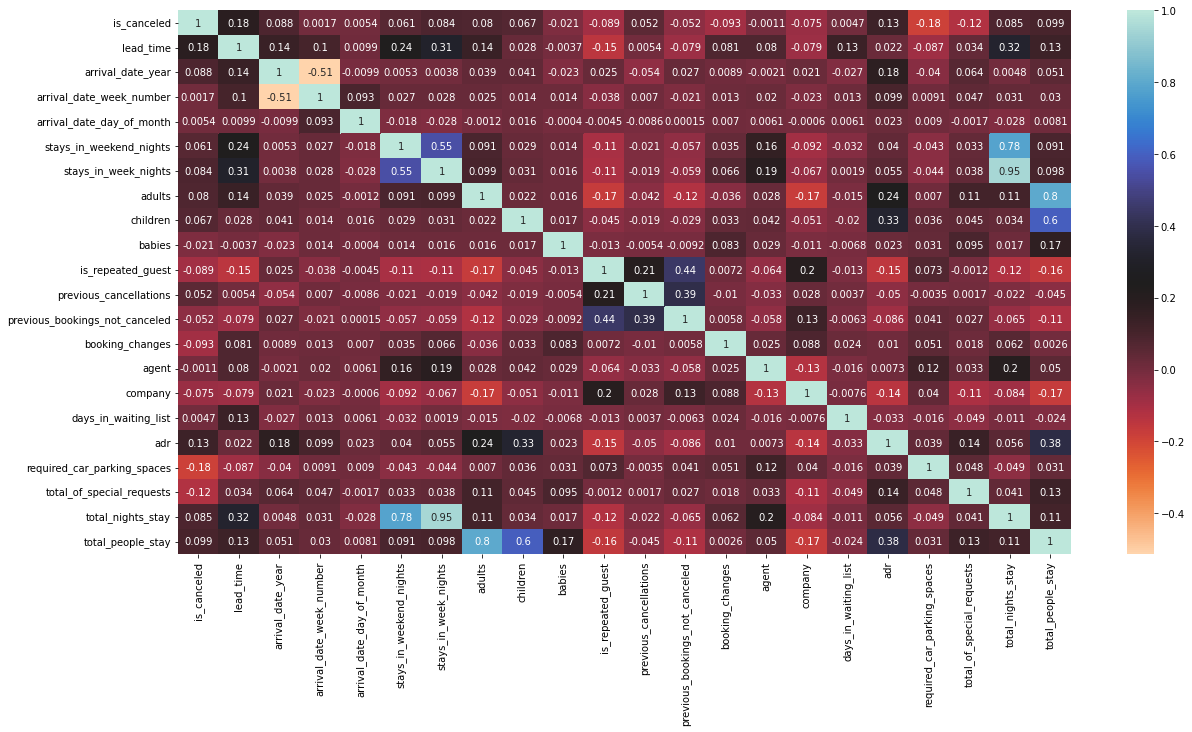

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,cmap='icefire_r',annot=True)

In [ ]:
new_df = df[['hotel','lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','total_people_stay','arrival_date_month']]
corr_new_df=new_df.corr()
corr_new_df


,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_people_stay
lead_time,1.000000,0.005370,-0.079021,0.080822,0.021948,0.125262
previous_cancellations,0.005370,1.000000,0.391766,-0.010267,-0.050359,-0.045222
previous_bookings_not_canceled,-0.079021,0.391766,1.000000,0.005774,-0.086052,-0.114406
booking_changes,0.080822,-0.010267,0.005774,1.000000,0.010144,0.002619
adr,0.021948,-0.050359,-0.086052,0.010144,1.000000,0.382210
total_people_stay,0.125262,-0.045222,-0.114406,0.002619,0.382210,1.000000


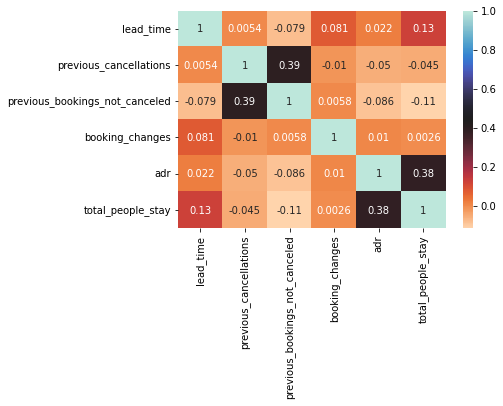

In [ ]:
sns.heatmap(corr_new_df,cmap='icefire_r',annot=True)



Total no of peoples stay in the hotel and lead time have slightly positive correlation. 

 adr is slightly correlated with total_people_stay, which makes sense as more no. of people means more revenue, therefore more adr.








# Conclusion

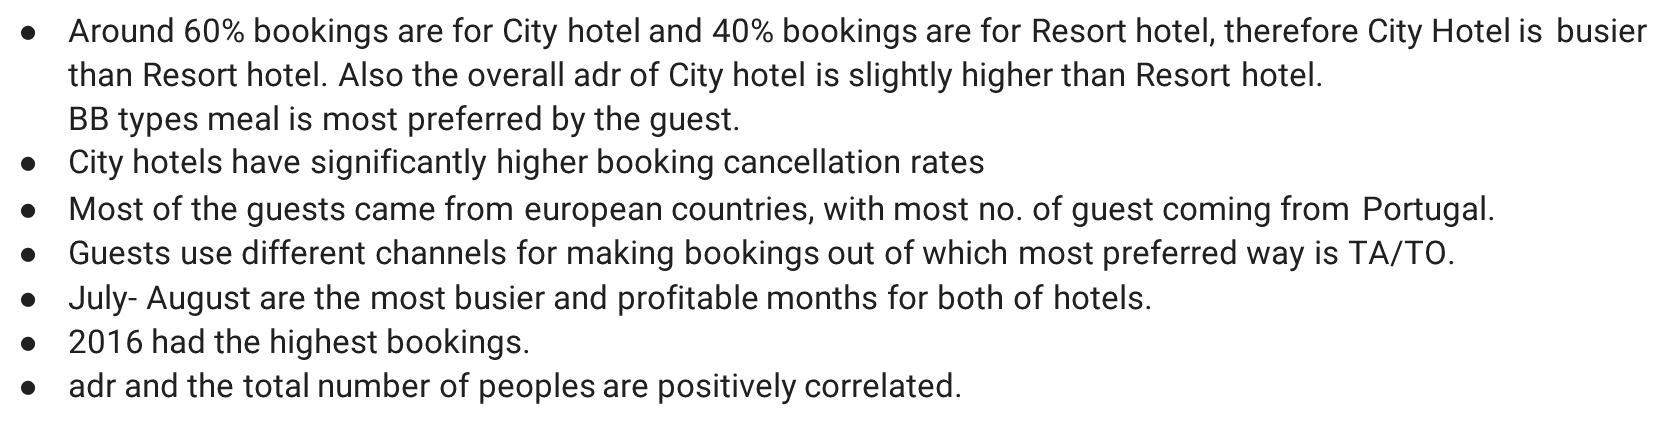

## Thank you